# Broadcasting with expand_dims()

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


### Plotting functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
### plotting function
def plot_graph(X, Y, X_hat=None, Y_hat=None,str_title=None):
    num_X = X.shape[0]
    fig = plt.figure(figsize=(6, 6))

    if str_title is not None:
        plt.title(str_title, fontsize=20, pad=20)

    plt.plot(X, Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)

    plt.tick_params(axis='both', labelsize=14)

### Preliminary

#### basic operation

In [3]:
a = tf.constant([12.0, 10.0, 6.0])
b = tf.constant([3.0, 5.0, 2.0])

amulb = tf.multiply(a,b) #amulb = a*b
adivb = tf.divide(a,b) #adivb = a/b
print(amulb)
print(adivb)

bselfmul = tf.multiply(b,b) #bselfmul = b*b
print(bselfmul)

tf.Tensor([36. 50. 12.], shape=(3,), dtype=float32)
tf.Tensor([4. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([ 9. 25.  4.], shape=(3,), dtype=float32)


#### 'tf.math.sqrt'

In [4]:
x = tf.constant([4.0, 9.0, 16.0, 25.0])
print(x)
x_sqrt = tf.math.sqrt(x)
print(x_sqrt)

tf.Tensor([ 4.  9. 16. 25.], shape=(4,), dtype=float32)
tf.Tensor([2. 3. 4. 5.], shape=(4,), dtype=float32)


## Implement L2-normalization

$$L2 \, Normalized \, (x_1, y_1) = ( \frac {x_1}{\sqrt {x_1^2 + y_1^2}} , \frac {y_1}{\sqrt {x_1^2 + y_1^2}} )$$

L2-normalization을 하려면 각 행에 대한 L2 norm값을 구해 각 행의 값을 나눠주면 됩니다.

In [5]:
num_points = 30 # you can change this
a = tf.constant(np.random.randn(num_points,2),dtype=float)
print(a.shape)
print(a)

(30, 2)
tf.Tensor(
[[ 0.48277745  0.2022109 ]
 [-0.37107086  2.65778   ]
 [-0.4386774   0.1556151 ]
 [-0.8888892   0.44709507]
 [-1.7271385  -0.3964173 ]
 [ 0.59600294  0.50653446]
 [-1.0337743   1.2006506 ]
 [ 1.2133691  -2.2061243 ]
 [ 2.1299396   1.4370472 ]
 [ 0.86251307  0.34142908]
 [-0.4309342   0.7298044 ]
 [ 0.4330285  -1.6622657 ]
 [-1.6657776   0.9650989 ]
 [ 0.6829371  -0.6721445 ]
 [-1.0354702  -0.49434566]
 [ 0.7275528  -0.20001607]
 [-1.6018318   1.4022602 ]
 [ 1.6695983   0.2751517 ]
 [ 1.2637099  -1.3827753 ]
 [-2.8395572  -0.41831782]
 [ 1.2514458   1.0588758 ]
 [-1.0592299   0.24987422]
 [ 0.16215955  0.8557935 ]
 [-0.66797465  0.50607103]
 [ 0.36069772 -1.785925  ]
 [-0.22456957 -0.9712831 ]
 [-0.9859824   0.326665  ]
 [ 1.3864539   0.1915691 ]
 [ 0.40131637  0.6623523 ]
 [-1.1030501   0.8347709 ]], shape=(30, 2), dtype=float32)


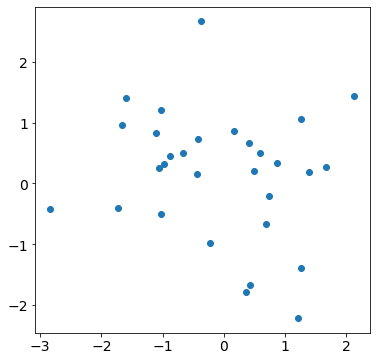

In [6]:
# visulization
plot_graph(a[:,0],a[:,1])

In [23]:
#--------(TODO start)--------# 조교님
### l2 normalization step
# self-multiplication
a2 = a*a

# reduce sum
a_rs = tf.reduce_sum(a2, 1)
#a_rs = tf.reduce_sum(a2, 1, keepdims=True)

# square root
a_sqrt = tf.math.sqrt(a_rs)

# expand dim for boardcast
a_exp = tf.expand_dims(a_sqrt,1)

# division by broadcast
a_normalized = a/a_exp
#--------(TODO end)--------#

In [11]:
#--------(TODO start)--------#
### l2 normalization step
# self-multiplication
selfmul = tf.multiply(a,a)

# reduce sum
xy_sum = selfmul[:,0]+selfmul[:,1]

# square root
xy_sqrt = tf.math.sqrt(xy_sum)

# expand dim for boardcast
xy_expand = tf.expand_dims(xy_sqrt,1)

# division by broadcast
a_normalized = tf.divide(a,xy_expand)
#--------(TODO end)--------#

In [12]:
a_normalized

<tf.Tensor: shape=(30, 2), dtype=float32, numpy=
array([[ 0.9223606 ,  0.38632992],
       [-0.13827567,  0.9903938 ],
       [-0.942458  ,  0.33432472],
       [-0.8933591 ,  0.44934335],
       [-0.97465676, -0.22370572],
       [ 0.7619822 ,  0.6475979 ],
       [-0.6524799 ,  0.757806  ],
       [ 0.481919  , -0.8762158 ],
       [ 0.82896805,  0.55929583],
       [ 0.9298001 ,  0.3680649 ],
       [-0.5084548 ,  0.8610887 ],
       [ 0.25209156, -0.9677034 ],
       [-0.8652683 ,  0.5013091 ],
       [ 0.7127159 , -0.70145273],
       [-0.90243226, -0.43083176],
       [ 0.964226  , -0.26508138],
       [-0.7524236 ,  0.6586794 ],
       [ 0.98669076,  0.16260776],
       [ 0.6746116 , -0.7381728 ],
       [-0.9893222 , -0.14574495],
       [ 0.7633983 ,  0.6459281 ],
       [-0.9732851 ,  0.2295997 ],
       [ 0.18617173,  0.98251724],
       [-0.7970751 ,  0.60388017],
       [ 0.19796959, -0.98020816],
       [-0.22526646, -0.97429717],
       [-0.94925815,  0.31449792],
      

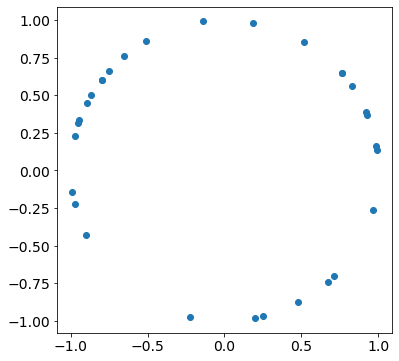

In [24]:
# visulization
plot_graph(a_normalized[:,0],a_normalized[:,1])

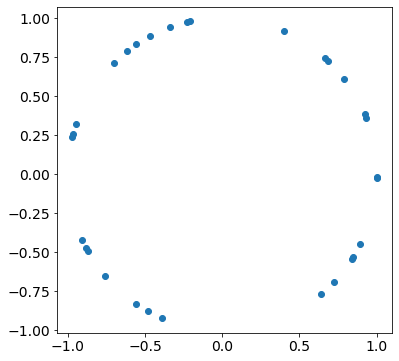

In [81]:
### one-line code from tf
a_tfnormalized = tf.math.l2_normalize(a,axis=1)
plot_graph(a_tfnormalized[:,0], a_tfnormalized[:,1])